In [249]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
%matplotlib inline

In [250]:
df = pd.read_csv('assets/train.csv')
df.tail()

,row_id,datetime,energy
94987,94988,2018-12-31 19:00:00,2528.4468
94988,94989,2018-12-31 20:00:00,2461.8836
94989,94990,2018-12-31 21:00:00,2365.9944
94990,94991,2018-12-31 22:00:00,2342.9428
94991,94992,2018-12-31 23:00:00,2180.2176


In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94992 entries, 0 to 94991
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   row_id    94992 non-null  int64  
 1   datetime  94992 non-null  object 
 2   energy    93092 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.2+ MB


In [252]:
df.describe()

,row_id,energy
count,94992.000000,93092.000000
mean,47496.500000,1702.995014
std,27421.972723,369.322103
min,1.000000,866.388600
25%,23748.750000,1431.541100
50%,47496.500000,1654.465800
75%,71244.250000,1935.993450
max,94992.000000,3374.399600


In [253]:
df.isna().sum()

row_id         0
datetime       0
energy      1900
dtype: int64

<AxesSubplot:>

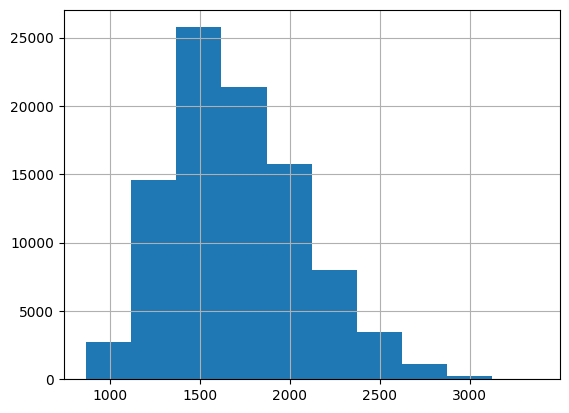

In [254]:
df['energy'].hist()

In [255]:
df['energy'].fillna(df['energy'].median(), inplace=True)
df.isna().sum()

row_id      0
datetime    0
energy      0
dtype: int64

In [256]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['datetime'].head()

0   2008-03-01 00:00:00
1   2008-03-01 01:00:00
2   2008-03-01 02:00:00
3   2008-03-01 03:00:00
4   2008-03-01 04:00:00
Name: datetime, dtype: datetime64[ns]

In [257]:
df['year']= df.datetime.dt.year
df['month'] = df.datetime.dt.month
df['day'] = df.datetime.dt.day
df['hour'] = df.datetime.dt.hour
df['week'] = df.datetime.dt.isocalendar().week.astype(int)
df['dayofweek'] = df.datetime.dt.dayofweek
df['dayofyear'] = df.datetime.dt.dayofyear
df['quarter'] = df.datetime.dt.quarter
df['days_in_month'] = df.datetime.dt.days_in_month

df['is_month_start'] = df.datetime.dt.is_month_start.astype(int)
df['is_month_end'] = df.datetime.dt.is_month_end.astype(int)
df['is_quarter_start'] = df.datetime.dt.is_quarter_start.astype(int)
df['is_quarter_end'] = df.datetime.dt.is_quarter_end.astype(int)
df['is_year_start'] = df.datetime.dt.is_year_start.astype(int)
df['is_year_end'] = df.datetime.dt.is_year_end.astype(int)
df['is_leap_year'] = df.datetime.dt.is_leap_year.astype(int)
df['is_weekend'] = df.datetime.dt.dayofweek.isin([5,6]).astype(int)
df['is_weekday'] = df.datetime.dt.dayofweek.isin([0,1,2,3,4]).astype(int)
df['is_holiday'] = df.datetime.dt.dayofweek.isin([5,6]).astype(int)


df.head(5)

,row_id,datetime,energy,year,month,day,hour,week,dayofweek,dayofyear,quarter,days_in_month,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_leap_year,is_weekend,is_weekday,is_holiday
0,1,2008-03-01 00:00:00,1259.985563,2008,3,1,0,9,5,61,1,31,1,0,0,0,0,0,1,1,0,1
1,2,2008-03-01 01:00:00,1095.541500,2008,3,1,1,9,5,61,1,31,1,0,0,0,0,0,1,1,0,1
2,3,2008-03-01 02:00:00,1056.247500,2008,3,1,2,9,5,61,1,31,1,0,0,0,0,0,1,1,0,1
3,4,2008-03-01 03:00:00,1034.742000,2008,3,1,3,9,5,61,1,31,1,0,0,0,0,0,1,1,0,1
4,5,2008-03-01 04:00:00,1026.334500,2008,3,1,4,9,5,61,1,31,1,0,0,0,0,0,1,1,0,1


In [258]:
print(df.month.value_counts())

3     8184
5     8184
7     8184
8     8184
10    8184
12    8184
4     7920
6     7920
9     7920
11    7920
1     7440
2     6768
Name: month, dtype: int64


In [259]:
X = df.drop(['datetime','energy'], axis=1)
y = df['energy']

In [260]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [261]:
params = {
    'learning_rate': np.arange(0.05,0.18,0.01),
    'max_depth': [6,7,8],
    'min_child_weight': [5, 6, 7, 8],
    'gamma': [0],
    'colsample_bytree': np.arange(0.6,0.7,0.01),
    'n_estimators': [600,1200,2400],
    'reg_lambda': np.arange(1,2,0.1),
    'reg_alpha': np.arange(0,1,0.1),
}

xgb = XGBRegressor(tree_method='gpu_hist')
search = RandomizedSearchCV(xgb, params, n_iter=5, scoring='neg_root_mean_squared_error', cv=5, verbose=3, n_jobs=-1)
search.fit(X_train, y_train)
print(search.best_params_)

In [283]:
# get params
XGBRegressor().get_params().keys()

dict_keys(['objective', 'base_score', 'booster', 'callbacks', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'early_stopping_rounds', 'enable_categorical', 'eval_metric', 'feature_types', 'gamma', 'gpu_id', 'grow_policy', 'importance_type', 'interaction_constraints', 'learning_rate', 'max_bin', 'max_cat_threshold', 'max_cat_to_onehot', 'max_delta_step', 'max_depth', 'max_leaves', 'min_child_weight', 'missing', 'monotone_constraints', 'n_estimators', 'n_jobs', 'num_parallel_tree', 'predictor', 'random_state', 'reg_alpha', 'reg_lambda', 'sampling_method', 'scale_pos_weight', 'subsample', 'tree_method', 'validate_parameters', 'verbosity'])

In [294]:
# RMSE - 284.97
xgb = XGBRegressor(reg_lambda=1.3, reg_alpha=0.3, 
            n_estimators=1200, learning_rate=0.13, 
            min_child_weight=7, max_depth=7, gamma=0, 
            colsample_bytree=0.64, tree_method = 'gpu_hist',
            random_state=4243, eval_metric='rmse', max_leaves=2**7)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.64,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric='rmse', feature_types=None, gamma=0, gpu_id=0,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.13, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=7, max_leaves=128, min_child_weight=7, missing=nan,
             monotone_constraints='()', n_estimators=1200, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=4243, ...)

In [295]:
from sklearn.metrics import mean_squared_error
pred = xgb.predict(X_test)
score = mean_squared_error(pred, y_test)
print('Test score', np.sqrt(score))

Test score 68.25990378979446


In [264]:
test_df = pd.read_csv('assets/test.csv')
test_df.head()

,row_id,datetime
0,94993,2019-01-01 00:00:00
1,94994,2019-01-01 01:00:00
2,94995,2019-01-01 02:00:00
3,94996,2019-01-01 03:00:00
4,94997,2019-01-01 04:00:00


In [265]:
test_df['datetime'] = pd.to_datetime(test_df['datetime'])
test_df['year']= test_df.datetime.dt.year
test_df['month'] = test_df.datetime.dt.month
test_df['day'] = test_df.datetime.dt.day
test_df['hour'] = test_df.datetime.dt.hour
test_df['week'] = test_df.datetime.dt.isocalendar().week.astype(int)
test_df['dayofweek'] = test_df.datetime.dt.dayofweek
test_df['dayofyear'] = test_df.datetime.dt.dayofyear
test_df['quarter'] = test_df.datetime.dt.quarter
test_df['days_in_month'] = test_df.datetime.dt.days_in_month

test_df['is_month_start'] = test_df.datetime.dt.is_month_start.astype(int)
test_df['is_month_end'] = test_df.datetime.dt.is_month_end.astype(int)
test_df['is_quarter_start'] = test_df.datetime.dt.is_quarter_start.astype(int)
test_df['is_quarter_end'] = test_df.datetime.dt.is_quarter_end.astype(int)
test_df['is_year_start'] = test_df.datetime.dt.is_year_start.astype(int)
test_df['is_year_end'] = test_df.datetime.dt.is_year_end.astype(int)
test_df['is_leap_year'] = test_df.datetime.dt.is_leap_year.astype(int)
test_df['is_weekend'] = test_df.datetime.dt.dayofweek.isin([5,6]).astype(int)
test_df['is_weekday'] = test_df.datetime.dt.dayofweek.isin([0,1,2,3,4]).astype(int)
test_df['is_holiday'] = test_df.datetime.dt.dayofweek.isin([5,6]).astype(int)

test_df.drop('datetime', axis=1, inplace=True)
test_df.sample()

,row_id,year,month,day,hour,week,dayofweek,dayofyear,quarter,days_in_month,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_leap_year,is_weekend,is_weekday,is_holiday
9852,104845,2020,2,15,12,7,5,46,1,29,0,0,0,0,0,0,1,1,0,1


In [266]:
pred = xgb.predict(test_df)
output = pd.DataFrame([test_df['row_id'], pred]).T
output.columns = ['row_id', 'energy']
output['row_id'] = output['row_id'].astype(int)
output.to_csv('sample_submission.csv', index=False)
output.head()

,row_id,energy
0,94993,1548.185059
1,94994,1485.806519
2,94995,1379.129272
3,94996,1321.674316
4,94997,1321.453369
